<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [42]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [22]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
url = "https://raw.githubusercontent.com/bbrauser/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv"

df = pd.read_csv(url)
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [23]:
# Dropping 'Unnamed: 0' column
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [24]:
# Cleaning 'description' column by removing HTML tags
import bs4
df['description'] = df['description'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())
df.head()

,description,title
0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [25]:
nlp = spacy.load("en_core_web_lg")

In [27]:
# Function to tokenize
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

df['tokens'] = df['description'].apply(tokenize)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [31]:
# create the transformer
vect = CountVectorizer(stop_words='english', 
                       max_df=.95,
                       max_features=1500,
                      ngram_range=(1,3),
                      tokenizer=tokenize)
data = df.tokens

# build vocab
#vect.fit(data)

# transform text
dtm = vect.fit_transform(df.description)
#word_vect = df['tokens'].apply(lambda x: vect.fit_transform(x))
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [34]:
dtm.shape

(426, 1500)

## 4) Visualize the most common word counts

In [35]:
dtm.sum().sort_values(ascending=False).head(10)

business            1093
experience          1022
work                 927
science              877
team                 859
learning             842
machine              667
analytics            645
machine learning     598
analysis             581
dtype: int64

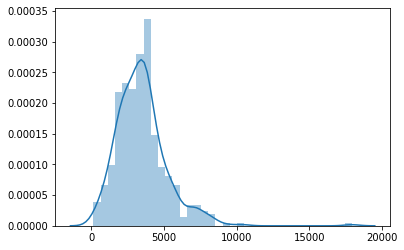

In [38]:
import seaborn as sns

doc_len = [len(doc) for doc in df.description]

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [40]:
# Instantiating vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Creating vocab and getting word counts per document
dtm2 = tfidf.fit_transform(df.description)
dtm2 = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())
dtm2.head()

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [44]:
#Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm2)
nn.kneighbors([dtm2.iloc[42].values])

(array([[0.        , 0.        , 1.20452612, 1.2724882 , 1.2724882 ]]),
 array([[138,  42, 226,  52, 142]]))

In [46]:
df.description[42]

"b'Job Description\\n\\n5-10 years hands-on experience in forecasting, Machine learning, and/or optimization modeling, and simulation.Working knowledge of predictive modeling and ML tools (scikit, R)Experience with data acquisition tools (e.g. SQL, Apache Spark etc.), large datasets (Hadoop) and data miningProgramming language (Java, scripting language like Python.Good understanding of NLP conceptsHave understanding of machine learning conceptsHave understanding of Hadoop (specifically HIVE/HDFS/Kafka)Fine on programming concepts \\xe2\\x80\\x93 pythonStronger skills on image analysis and more experience in Machine Learning / Deep Learning\\n\\nQualifications\\n\\nnull\\n\\nAdditional Information\\n\\nAll your information will be kept confidential according to EEO guidelines.'"

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 